<a href="https://colab.research.google.com/github/Kent7474/Proyecto_Seminario/blob/main/An%C3%A1lisis_de_activos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import de librerías

In [ ]:
# Frameworks principales
import pandas as pd
import numpy as np

# from pandas_datareader import data as pdr #No está funcionando
import yfinance as yf

# Frameworks secundarios
from datetime import datetime
    # Visualización
import matplotlib.pyplot as plt
import statistics
import seaborn as sns


# DEFINICIÓN DE ACTIVOS Y FECHAS

## Periodos - Fecha inicio y fin

In [ ]:
 #  YYYY-mm-dd
fechaInicio = "2021-11-01"
today = "2022-11-01"
#today = datetime.today().strftime('%Y-%m-%d')

In [ ]:
#activos = ["AAPL", "MSFT", "AMZN", "GOOGL", "ENPH", "META", "PEP", "TSLA", "V", "CAR", "TTD", "AMGN", "AAL", "TMUS", "CPRX"]
#activos = ["AAPL", "MSFT", "AMZN", "GOOGL", "META", "TSLA", "V"]
#activos = ["MNK", "MSFT", "AMZN", "CCEL", "META", "TSLA", "BKTI"]

''' NASDAQ, más rendimiento a mayor riesgo'''
#activos = ["AMD","LCID", "MNST", "BIIB", "NVDA", "ADBE", "NFLX", "INTC"]

#activos = ["AMD","LCID", "MNST", "BIIB", "NVDA", "ADBE", "NFLX", "INTC", "HON","GFS", "FISV", "FAST", "EXC", "CSX", "CRWD", "COST", "MELI", "META", "MRVL", "MAR", "LULU", "HON", "GFS" ]
#activos = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'JNJ', 'PG', 'V', 'JPM', 'KO', 'PEP', 'XOM', 'CVX', 'T', 'VZ', 'INTC', 'CSCO', 'ADBE', 'CRM', 'ABT', 'AMGN', 'UNH', 'PFE', 'MRK', 'BMY', 'RTX', 'LMT', 'GS', 'MA']

''' Excel facu '''
#activos = ['FNKO', 'PEP', 'MCD', 'SONY', 'DIS', 'CMCSA', 'NTDOY', 'CCOEY', 'MDLZ', 'GME']

'''Excel práctica en clase '''
activos = ['TSLA', 'META', 'AAPL', 'AMZN', 'NFLX']

len(activos)

5

## Descarga y visualización de rendimientos.
###(Columna 'Adj Close') desde Yahoo Finance.

In [ ]:
''' Con la función yf.download descargamos los rendimientos de cada activo
    según las fechas dadas (fechaInicio y today). De todas las columnas que
    nos trae, nos quedamos con 'Adj Close' '''
dataSet = yf.download(activos, start=fechaInicio, end=today, interval='1mo')['Adj Close']

''' Revisamos los primero y los últimos 3 registros del DataFrame, 
     para asegurarnos que tenga datos.'''
display(dataSet)
pd.DataFrame(dataSet).to_excel("DataSet.xlsx")
#display(dataSet.head(3))
#display(dataSet.tail(3))

[*********************100%***********************]  5 of 5 completed


,AAPL,AMZN,META,NFLX,TSLA
Date,,,,,
2021-11-01,163.630173,175.353500,324.459991,641.900024,381.586670
2021-12-01,176.032745,166.716995,336.350006,602.440002,352.260010
2022-01-01,173.266876,149.573502,313.260010,427.140015,312.239990
2022-02-01,163.690521,153.563004,211.029999,394.519989,290.143341
2022-03-01,173.318909,162.997498,222.360001,374.589996,359.200012
2022-04-01,156.484314,124.281502,200.470001,190.360001,290.253326
2022-05-01,147.739441,120.209503,193.639999,197.440002,252.753326
2022-06-01,135.908463,106.209999,161.250000,174.869995,224.473328
2022-07-01,161.545364,134.949997,159.100006,224.899994,297.149994


In [ ]:
dataSet.max()

AAPL    176.032745
AMZN    175.353500
META    336.350006
NFLX    641.900024
TSLA    381.586670
dtype: float64

### Gráfico de precios de períodos

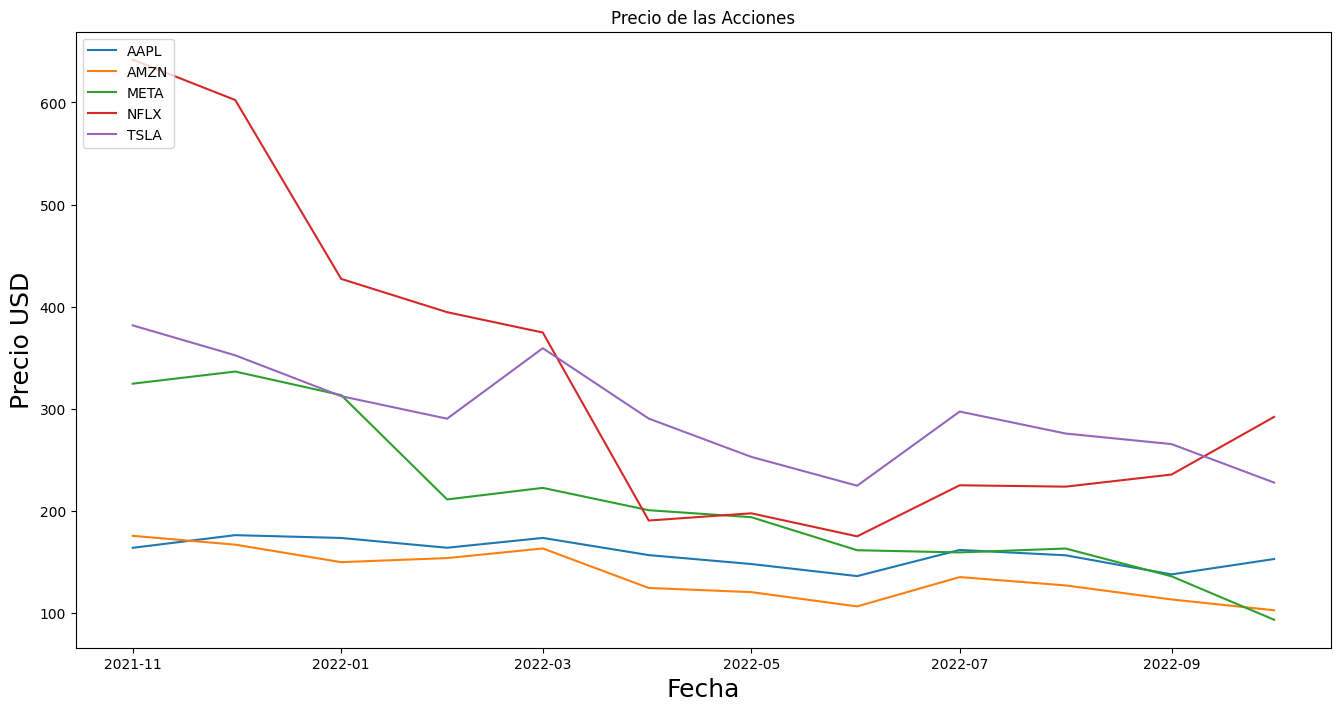

In [ ]:
plt.figure(figsize=(16.2, 8))
for i in dataSet.columns.values:
    plt.plot(dataSet[i], label=i)
plt.title('Precio de las Acciones')
plt.xlabel('Fecha', fontsize=18)
plt.ylabel('Precio USD', fontsize=18)
plt.legend(dataSet.columns.values, loc='upper left')
plt.savefig('plotprecios.png', dpi=200, bbox_inches='tight')
plt.show()


### Calculamos el rendimiento de cada acción con el periodo anterior

In [ ]:
''' Divide el valor de cada columna (df) por la columna anterior (df.shift(1))
    Luego le resta -1 para obtener el rendimiento.'''
rendimiento = (dataSet / dataSet.shift(1) -1).dropna()
rendimiento * 100

,AAPL,AMZN,META,NFLX,TSLA
Date,,,,,
2021-12-01,7.579637,-4.925197,3.664555,-6.147378,-7.685452
2022-01-01,-1.571224,-10.282991,-6.864872,-29.098331,-11.360932
2022-02-01,-5.526939,2.667252,-32.634236,-7.636846,-7.076816
2022-03-01,5.882068,6.143729,5.368906,-5.051707,23.800881
2022-04-01,-9.713075,-23.752509,-9.844396,-49.181771,-19.194511
2022-05-01,-5.588338,-3.276432,-3.406994,3.719270,-12.919749
2022-06-01,-8.008003,-11.645921,-16.726916,-11.431324,-11.188774
2022-07-01,18.863359,27.059597,-1.333330,28.609825,32.376526
2022-08-01,-3.255170,-6.061505,2.407282,-0.595819,-7.248867


### Calculo de esperanza, varianza y desvío estandar

In [ ]:
esp_var_desv = pd.DataFrame(rendimiento.mean() *100, columns=["Esperanza"])

esp_var_desv = esp_var_desv.T
esp_var_desv = esp_var_desv.append(pd.DataFrame(rendimiento.var(ddof=0), columns=["Varianza"]).T)
esp_var_desv = esp_var_desv.append(pd.DataFrame(rendimiento.std(ddof=0)*100, columns=["STD"]).T)
esp_var_desv

<ipython-input-11-92ca6a712313>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  esp_var_desv = esp_var_desv.append(pd.DataFrame(rendimiento.var(ddof=0), columns=["Varianza"]).T)
<ipython-input-11-92ca6a712313>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  esp_var_desv = esp_var_desv.append(pd.DataFrame(rendimiento.std(ddof=0)*100, columns=["STD"]).T)


,AAPL,AMZN,META,NFLX,TSLA
Esperanza,-0.214378,-4.025572,-9.766674,-4.320721,-3.497582
Varianza,0.008583,0.015286,0.016026,0.043165,0.024070
STD,9.264369,12.363531,12.659210,20.776130,15.514527


### Distribución de rendimientos

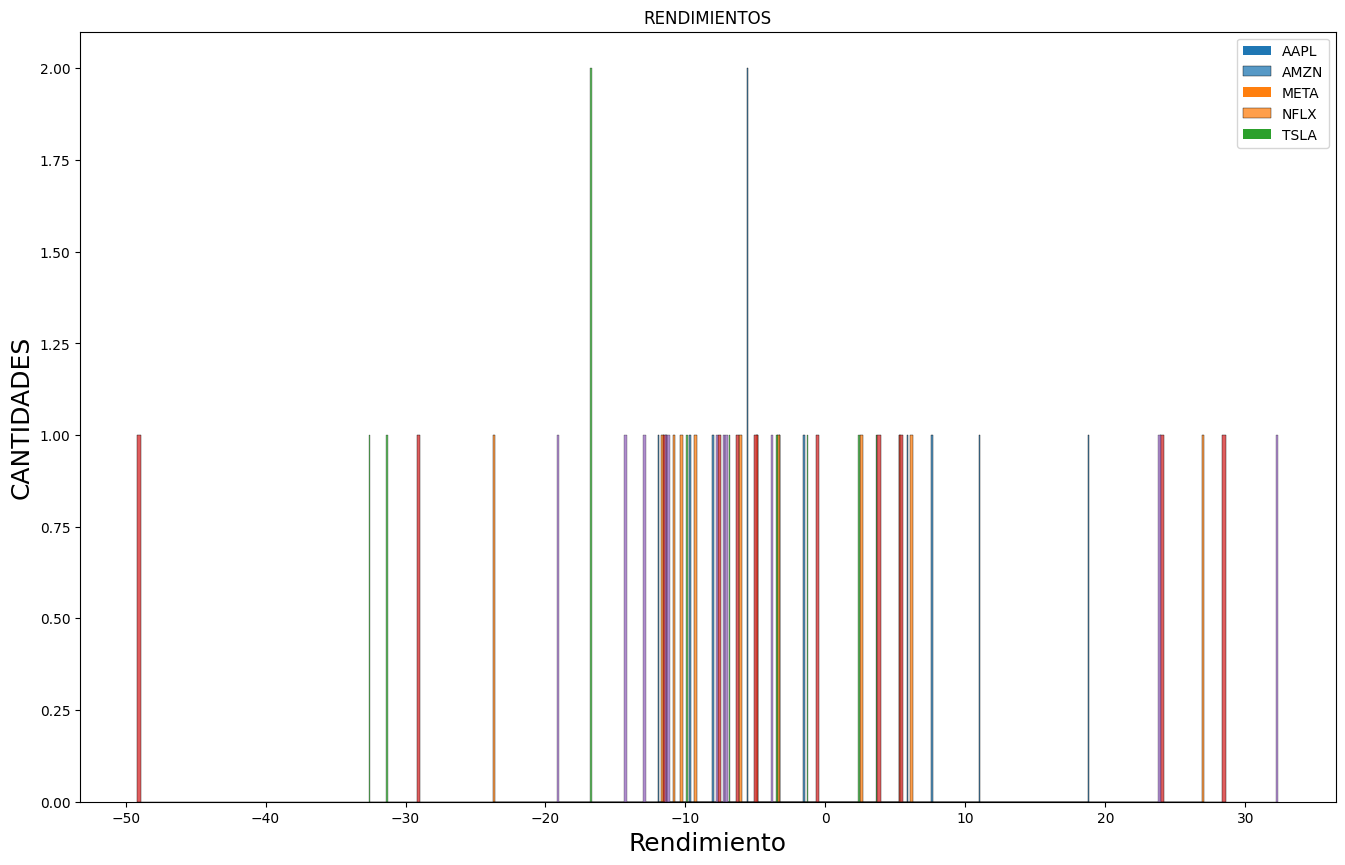

In [ ]:
plt.figure(figsize=(16.2, 10))
for i in rendimiento.columns.values:
    #plt.hist(rendimiento[i]*100, label = i, bins=300)
    sns.histplot(rendimiento[i]*100, label=i, bins=300)
plt.title('RENDIMIENTOS')
plt.xlabel('Rendimiento', fontsize=18)
plt.ylabel('CANTIDADES', fontsize=18)
plt.legend(rendimiento.columns.values, loc='upper left')
plt.legend(rendimiento.columns.values)
#eliminamos los extremos con menos cantidad de datos.
#plt.xlim(-20,20)
plt.show()

### Matriz de covarianzas.
Valor que refleja en cómo varían dos variables de forma conjunta respecto a sus medias.

In [ ]:
mCovarianza = rendimiento.cov(ddof=0, numeric_only=False)
cm = sns.light_palette("green", as_cmap=True)
mCovarianza.style.background_gradient(cmap=cm)

,AAPL,AMZN,META,NFLX,TSLA
AAPL,0.008583,0.008099,0.002728,0.011732,0.009112
AMZN,0.008099,0.015286,0.003906,0.017018,0.016813
META,0.002728,0.003906,0.016026,-0.002562,0.008188
NFLX,0.011732,0.017018,-0.002562,0.043165,0.015810
TSLA,0.009112,0.016813,0.008188,0.015810,0.024070


### Carga de pruebas de WEIGHT, Rendimiento y riesgo del portafolio

#### Se definen 3 arrays
- PesosPortafolio = pesos randoms con cantidad de elementos igual al numero de activos.
- rportafolio = Rendimiento del portafolio
- sdPortafolio = desvio standard, o riesgo del portafolio

In [ ]:
pesosPortafolio = []
rPortafolio = []
sdPortafolio = []

#guardamos la cantidad de activos que tenemos para el análisis.
nrosActivos = len(rendimiento.columns)
nrosActivos

5

In [ ]:
for x in range(10000):
    pesos = np.random.random(len(rendimiento.columns)) # Arreglo de 1 x la cantidad de activos
    # Dividir por la suma total de los números
    pesos /= np.sum(pesos)
    # Agrega cada prueba a la matriz
    pesosPortafolio.append(pesos)

    # Retorno la "sumaProducto" o el producto de la matriz 
    # con los porcentajes de inversion X el rendimiento de cada activo
    rPortafolio.append(np.dot(rendimiento.mean(), pesos)) # rendimiento.mean() = matriz de 7X1

    # np.dot(mCovarianzas, pesos)  retorna matriz 1X7 de multiplicar los
    # pesos(porcentaje a invertir) y la matriz de covarianzas
    # A esa matriz de 1X7 de varianzas, la vuelvo a multiplicar por pesos.T
    # eso nos devuelve un solo resultado, la varianza de la inversion y
    # posteriormente el STD
    sdPortafolio.append(np.sqrt(
        np.dot(pesos.T, np.dot(mCovarianza, pesos))
    ))

## Ejemplo
Para la primera distribución de la inversión en % en los 7 activos:

In [ ]:
for i in range(len(pesosPortafolio[0])):
    print(rendimiento.columns[i],' -> ', round(pesosPortafolio[0][i]*100,2), '%')

AAPL  ->  16.72 %
AMZN  ->  21.76 %
META  ->  22.9 %
NFLX  ->  22.62 %
TSLA  ->  16.01 %


#### Va a tener el siguiente rendimiento:

In [ ]:
str(round(rPortafolio[0], 3)*100) + '%'

'-4.7%'

#### Tiene el siguiente riesgo (%):

In [ ]:
str(round(sdPortafolio[0], 3)*100) + '%'

'10.7%'

## A partir de estas 3 variables, vamos a buscar minimizar el riesgo y maximizar el retorno
Generamos un diccionario de listas -> lista de rendimiento, riesgo y una lista para cada accion con sus porcentajes de inversion

In [ ]:
diccionario = {'Rendimiento': rPortafolio, 'Riesgo': sdPortafolio}
for i, accion in enumerate(rendimiento.columns.tolist()):
    diccionario['USD ' + accion] = [w[i] for w in pesosPortafolio]

#####  Generamos un DataFrame a partir del diccionario para tener las inversiones, riesgo y rendimiento en una sola linea

In [ ]:
matrizPortafolio = pd.DataFrame(diccionario)
matrizPortafolio

,Rendimiento,Riesgo,USD AAPL,USD AMZN,USD META,USD NFLX,USD TSLA
0,-0.046853,0.107316,0.167155,0.217637,0.228977,0.226156,0.160076
1,-0.043291,0.098084,0.307377,0.087797,0.266036,0.153784,0.185005
2,-0.056811,0.091729,0.215510,0.298274,0.434710,0.010183,0.041324
3,-0.036515,0.100978,0.277769,0.503833,0.122462,0.039078,0.056857
4,-0.036019,0.124803,0.145459,0.252521,0.044884,0.203106,0.354030
...,...,...,...,...,...,...,...
79995,-0.029746,0.115399,0.258088,0.412202,0.008471,0.065100,0.256139
79996,-0.047806,0.110515,0.201791,0.072490,0.259569,0.340106,0.126044
79997,-0.028018,0.121986,0.321086,0.100549,0.015186,0.255247,0.307931
79998,-0.043858,0.091440,0.338273,0.240928,0.296581,0.014974,0.109244


## Frontera Eficiente
A continuación tenemos todas las carteras posibles con sus Riesgos y Rendimientos.

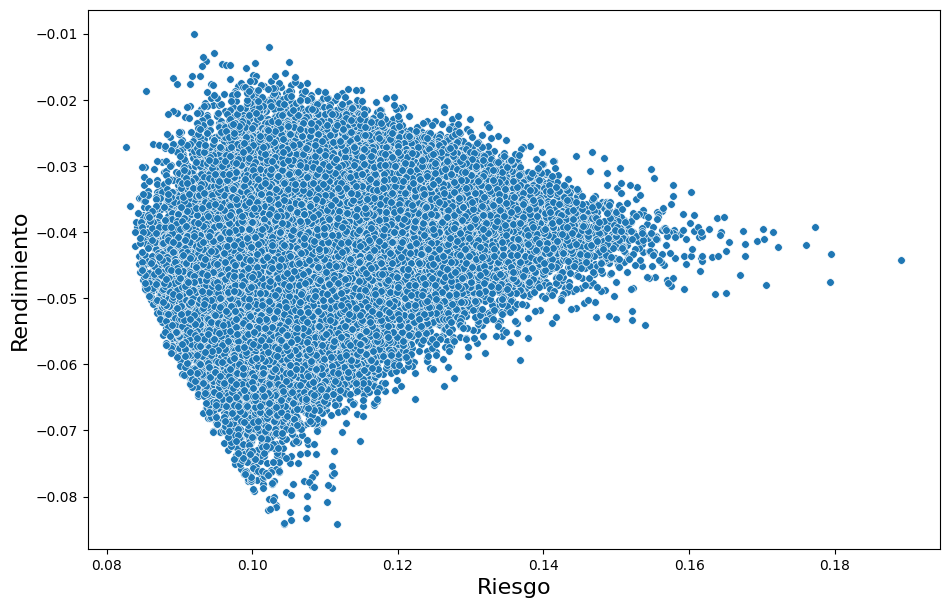

In [ ]:
plt.figure(figsize=(11,7))
sns.scatterplot(data=matrizPortafolio, x = 'Riesgo', y='Rendimiento', s=30)
plt.xlabel('Riesgo', fontsize=16)
plt.ylabel('Rendimiento', fontsize=16)
plt.show()

#### Mínima Varianza
Buscamos el menor riesgo. Las carteras eficientes en las cuales deberíamos invertir, debe tener riesgo mayor a la mínima varianza, pero siempre mayor rendimiento.
En el siguiente gráfico están ubicadas por encima de la línea punteada.

In [ ]:
minimaVarianza = matrizPortafolio.iloc[matrizPortafolio['Riesgo'].idxmin()]
display(minimaVarianza)
display(minimaVarianza.loc["Rendimiento"]*100)

Rendimiento   -0.027150
Riesgo         0.082720
USD AAPL       0.733202
USD AMZN       0.005236
USD META       0.258297
USD NFLX       0.003223
USD TSLA       0.000041
Name: 13760, dtype: float64

-2.715035946145055

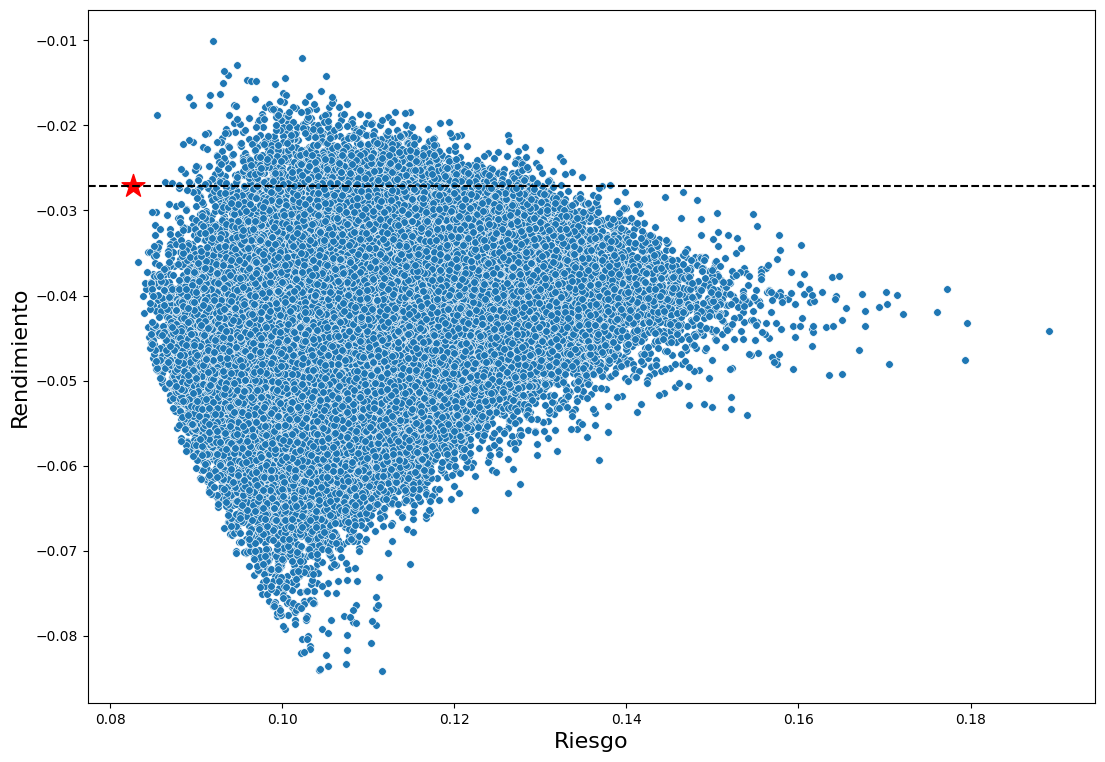

In [ ]:
plt.figure(figsize=(13,9))
sns.scatterplot(data=matrizPortafolio, x = 'Riesgo', y='Rendimiento', s=30)
plt.scatter(x=minimaVarianza[1], y=minimaVarianza[0], color='red', marker='*', s=300)
plt.axhline(y=minimaVarianza[0], color='black', linestyle='--')
plt.xlabel('Riesgo', fontsize=16)
plt.ylabel('Rendimiento', fontsize=16)
plt.show()

# REVISAR DESDE ACÁ
## TAMBIÉN ARRIBA COMO REPRESENTAR LOS VALORES EN %  (*100)

#### Portafolio optimo
Para cada Riesgo que estamos dispuestos a correr, tomamos el valor máximo de rendimiento

In [ ]:
porfolioOptimo = matrizPortafolio.loc[matrizPortafolio.groupby('Riesgo')['Rendimiento'].idxmax()].reset_index(drop=True)
porfolioOptimo.head()

,Rendimiento,Riesgo,USD AAPL,USD AMZN,USD META,USD NFLX,USD TSLA
0,-0.027150,0.082720,0.733202,0.005236,0.258297,0.003223,0.000041
1,-0.036067,0.083213,0.600060,0.032553,0.323775,0.039194,0.004418
2,-0.040029,0.083876,0.523687,0.098632,0.343510,0.023266,0.010905
3,-0.042074,0.083927,0.519628,0.059497,0.375482,0.037135,0.008258
4,-0.038494,0.084073,0.535445,0.100384,0.325936,0.016339,0.021897


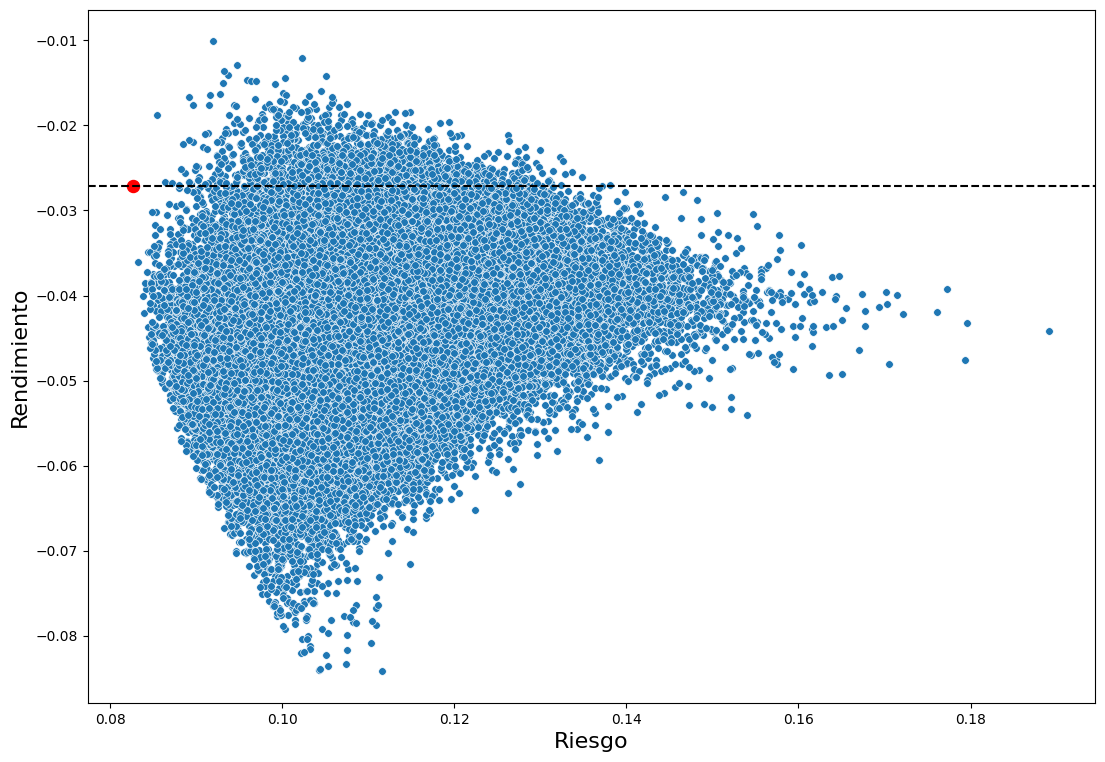

In [ ]:
plt.figure(figsize=(13,9))
sns.scatterplot(data=matrizPortafolio, x = 'Riesgo', y='Rendimiento', s=30)
plt.scatter(x=minimaVarianza[1], y=minimaVarianza[0], color='red', marker='.', s=300)
plt.axhline(y=minimaVarianza[0], color='black', linestyle='--')
plt.xlabel('Riesgo', fontsize=16)
plt.ylabel('Rendimiento', fontsize=16)
plt.show()

In [ ]:
mayorRendimiento = matrizPortafolio.loc[matrizPortafolio['Rendimiento'].idxmax()]
mayorRendimiento

Rendimiento   -0.010093
Riesgo         0.091943
USD AAPL       0.854869
USD AMZN       0.038391
USD META       0.042328
USD NFLX       0.039847
USD TSLA       0.024565
Name: 65732, dtype: float64

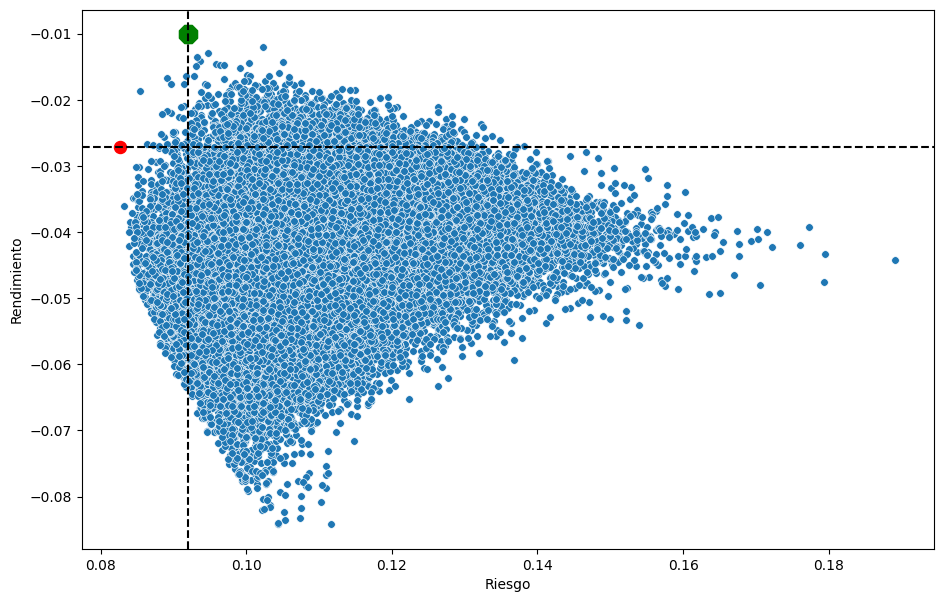

In [ ]:
'''matrizPortafolio.plot(x='Riesgo',y='Rendimiento', kind='scatter', figsize=(13,9) )
plt.scatter(x=minimaVarianza[1], y=minimaVarianza[0], color='red', marker='*', s=300)
plt.scatter(x=optimo[1], y=optimo[0], color='green', marker='*', s=300)
plt.savefig('FronteraEficiente', dpi=200)'''


plt.figure(figsize=(11,7))
sns.scatterplot(data=matrizPortafolio, x = 'Riesgo', y='Rendimiento', s=30)
plt.scatter(x=mayorRendimiento[1], y=mayorRendimiento[0], color='green', marker='8', s=200)
plt.scatter(x=minimaVarianza[1], y=minimaVarianza[0], color='red', marker='.', s=300)
plt.axhline(y=minimaVarianza[0], color='black', linestyle='--')
plt.axvline(x=mayorRendimiento[1], color='black', linestyle='--')
plt.show()

# Pruebas 

### selección de los portafolios óptimos
tomo una cantidad de registros y tomo su mayor rendimiento (malos resultados)

In [ ]:
# Crea nuevo DataFrame para almacenar los valores seleccionados
portafolioReducido = pd.DataFrame(columns=matrizPortafolio.columns)
# n es el rango que toma para tomar el máximo rendimiento
n = 30
for i in range(0, len(matrizPortafolio), n):
    # Toma las n filas correspondientes
    df_temp = matrizPortafolio.iloc[i:i+n]
    # selecciona el máximo rendimiento de esas n filas
    df_max = df_temp.loc[df_temp["Rendimiento"].idxmax()]
    # Agrega el registro en un nuevo dataframe
    portafolioReducido = portafolioReducido.append(df_max, ignore_index=True)



    

<ipython-input-127-7d57fb754a29>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portafolioReducido = portafolioReducido.append(df_max, ignore_index=True)


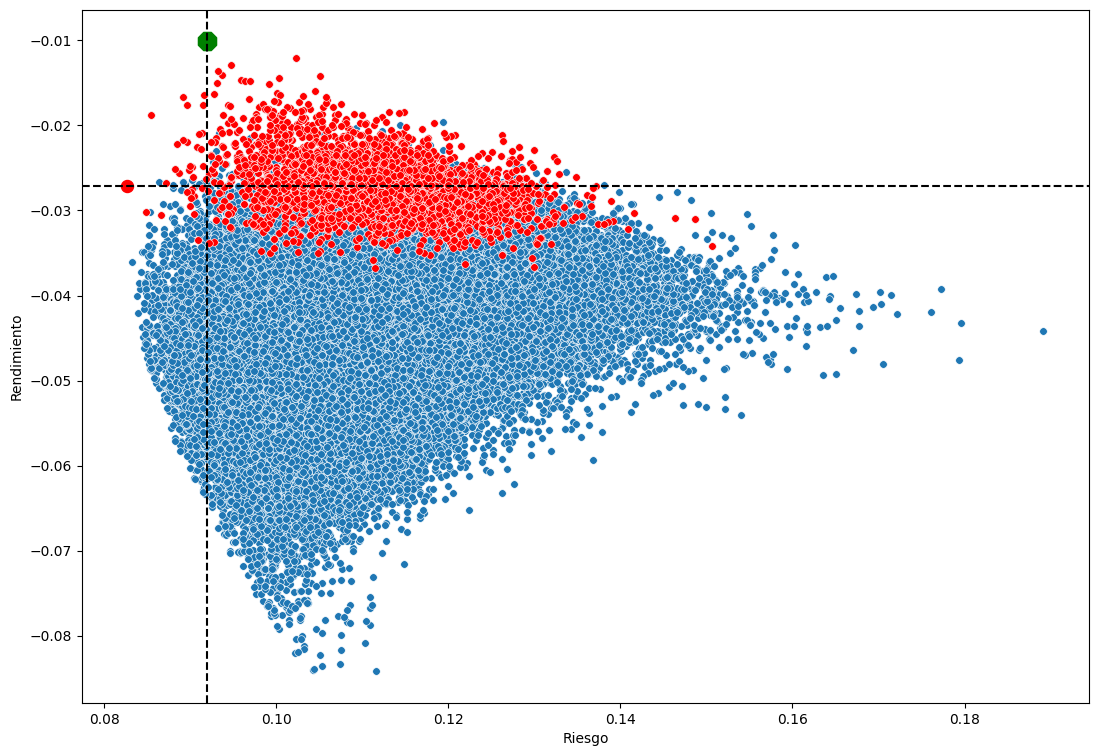

In [ ]:
plt.figure(figsize=(13,9))
sns.scatterplot(data=matrizPortafolio, x = 'Riesgo', y='Rendimiento', s=30)
sns.scatterplot(data=portafolioReducido, x = 'Riesgo', y='Rendimiento', color="red", s=30)
plt.scatter(x=mayorRendimiento[1], y=mayorRendimiento[0], color='green', marker='8', s=200)
plt.scatter(x=minimaVarianza[1], y=minimaVarianza[0], color='red', marker='.', s=300)
plt.axhline(y=minimaVarianza[0], color='black', linestyle='--')
plt.axvline(x=mayorRendimiento[1], color='black', linestyle='--')
plt.show()

### selección de los portafolios óptimos cuadrante superior izquierdo

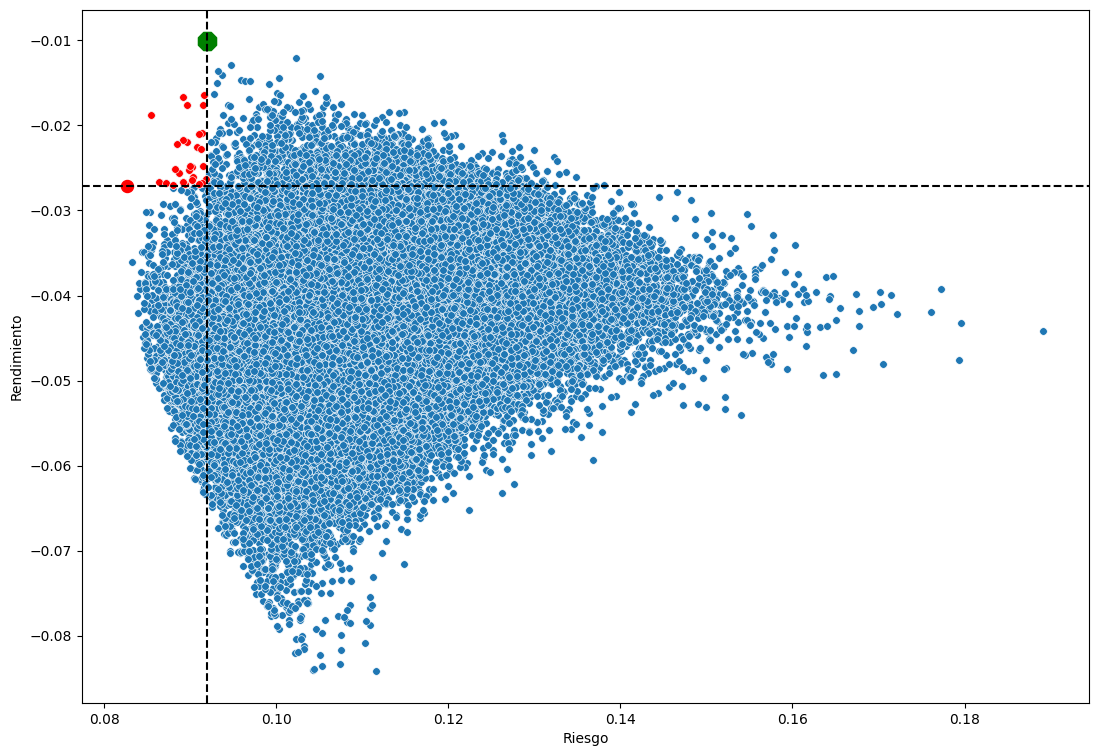

In [ ]:
m = matrizPortafolio
m = m[(m["Rendimiento"] > minimaVarianza[0]) & (m["Riesgo"] < mayorRendimiento[1])]


plt.figure(figsize=(13,9))
sns.scatterplot(data=matrizPortafolio, x = 'Riesgo', y='Rendimiento', s=30)
sns.scatterplot(data=m, x = 'Riesgo', y='Rendimiento', color="red", s=30)
plt.scatter(x=mayorRendimiento[1], y=mayorRendimiento[0], color='green', marker='8', s=200)
plt.scatter(x=minimaVarianza[1], y=minimaVarianza[0], color='red', marker='.', s=300)
plt.axhline(y=minimaVarianza[0], color='black', linestyle='--')
plt.axvline(x=mayorRendimiento[1], color='black', linestyle='--')
plt.show()

### Extraigo la pendiente de la recta que corta los puntos de mínimo riesgo y máximo retorno
b = y1 - m * x1

In [ ]:
# Encontrar la pendiente de la línea recta que cruza los dos puntos.
x1, y1 = minimaVarianza['Riesgo'], minimaVarianza['Rendimiento']
x2, y2 = mayorRendimiento['Riesgo'], mayorRendimiento['Rendimiento']
pendiente = (y2 - y1) / (x2 - x1)
print("Pendiente: ", pendiente)
b = y1 - pendiente * x1
print("Punto de corte", b)


Pendiente:  1.8494902623289367
Punto de corte -0.18014004714523366


In [ ]:
x_vals, y_vals = [], []
for index, row in m.iterrows():
    x = row['Riesgo']
    y = row['Rendimiento']
    if y > pendiente * x + b:
        x_vals.append(x)
        y_vals.append(y)
df_pendiente = pd.DataFrame({'Riesgo': x_vals, 'Rendimiento': y_vals})

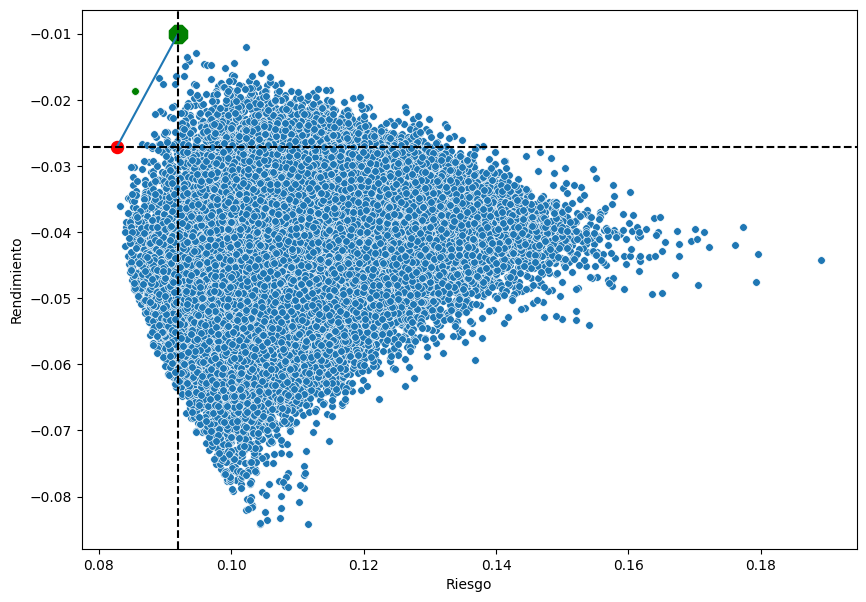

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=matrizPortafolio, x = 'Riesgo', y='Rendimiento', s=30)
sns.scatterplot(data=df_pendiente, x = 'Riesgo', y='Rendimiento', color="green", s=30)

# Puntos de menor riesgo(rojo) y mayor retorno(Verde)
plt.scatter(x=mayorRendimiento[1], y=mayorRendimiento[0], color='green', marker='8', s=200)
plt.scatter(x=minimaVarianza[1], y=minimaVarianza[0], color='red', marker='.', s=300)

plt.plot([mayorRendimiento[1], minimaVarianza[1]], [mayorRendimiento[0], minimaVarianza[0]])


plt.axhline(y=minimaVarianza[0], color='black', linestyle='--')
plt.axvline(x=mayorRendimiento[1], color='black', linestyle='--')
plt.show()

###Segmentar en 3 bloques de riesgos:
    - bajo
    - medio
    - alto


In [ ]:
matrizPortafolio

,Rendimiento,Riesgo,USD AAPL,USD AMZN,USD META,USD NFLX,USD TSLA
0,-0.046853,0.107316,0.167155,0.217637,0.228977,0.226156,0.160076
1,-0.043291,0.098084,0.307377,0.087797,0.266036,0.153784,0.185005
2,-0.056811,0.091729,0.215510,0.298274,0.434710,0.010183,0.041324
3,-0.036515,0.100978,0.277769,0.503833,0.122462,0.039078,0.056857
4,-0.036019,0.124803,0.145459,0.252521,0.044884,0.203106,0.354030
...,...,...,...,...,...,...,...
79995,-0.029746,0.115399,0.258088,0.412202,0.008471,0.065100,0.256139
79996,-0.047806,0.110515,0.201791,0.072490,0.259569,0.340106,0.126044
79997,-0.028018,0.121986,0.321086,0.100549,0.015186,0.255247,0.307931
79998,-0.043858,0.091440,0.338273,0.240928,0.296581,0.014974,0.109244


In [ ]:
matrizPortafolio[matrizPortafolio['Rendimiento'].between(0.017, 0.0178)]

,Rendimiento,Riesgo,USD AAPL,USD AMZN,USD META,USD NFLX,USD TSLA
